In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 


# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# initial plotting and plot styling libraries (will be overriden)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


# deep learning
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model 
from keras.layers import LSTM


# sklearn functionalities
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image


# jupyter theme overrides
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')
# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.figsize'] = (16, 8)
# recet to matplotlib standards
#jtplot.reset()

# matplotlib overrides
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

Using TensorFlow backend.


# Artificial Neural Networks for Time Series Forecasting

<strong>Artificial neural networks (ANNs)</strong> are computing systems inspired by the biological neural networks that constitute bilological brains. Such systems learn (progressively improve performance) to do tasks by considering examples, generally without task-specific programming (if-then clauses).

An ANN is based on a collection of connected units called <strong>Perceptrons</strong> analogous to neurons in a biological brain. Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it. - <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">Wikipedia</a>

https://www.youtube.com/watch?v=MVyauNNinC0


## Neural Network Basics

The basic constitutes of a ANN are **Perceptron**. A perceptron takes an input matrix $X$ and applies weights $W$ to each resulting in a weighted sum. This summed is transformed using an **Activation Function** and passed as the output $y$, also called **activation**. An activation function is a decision making function that determines the presence / importance of particular neural feature. It is (typically) mapped between 0 and 1, where zero mean the feature is not there, while one means the feature is present.

In [2]:
IFrame("./img/perceptron.pdf", width=1000, height=800)

NameError: name 'IFrame' is not defined

The purpose of the activation function is to introduce non-linearity into the network. Non-linear means that the output cannot be reproduced from a linear combination of the inputs. Since the perceptron is a **linear classifier**, i.e. it can only distinguish between two forms of output (e.g. 0 and 1), it is not capable of solving XOR problems like this

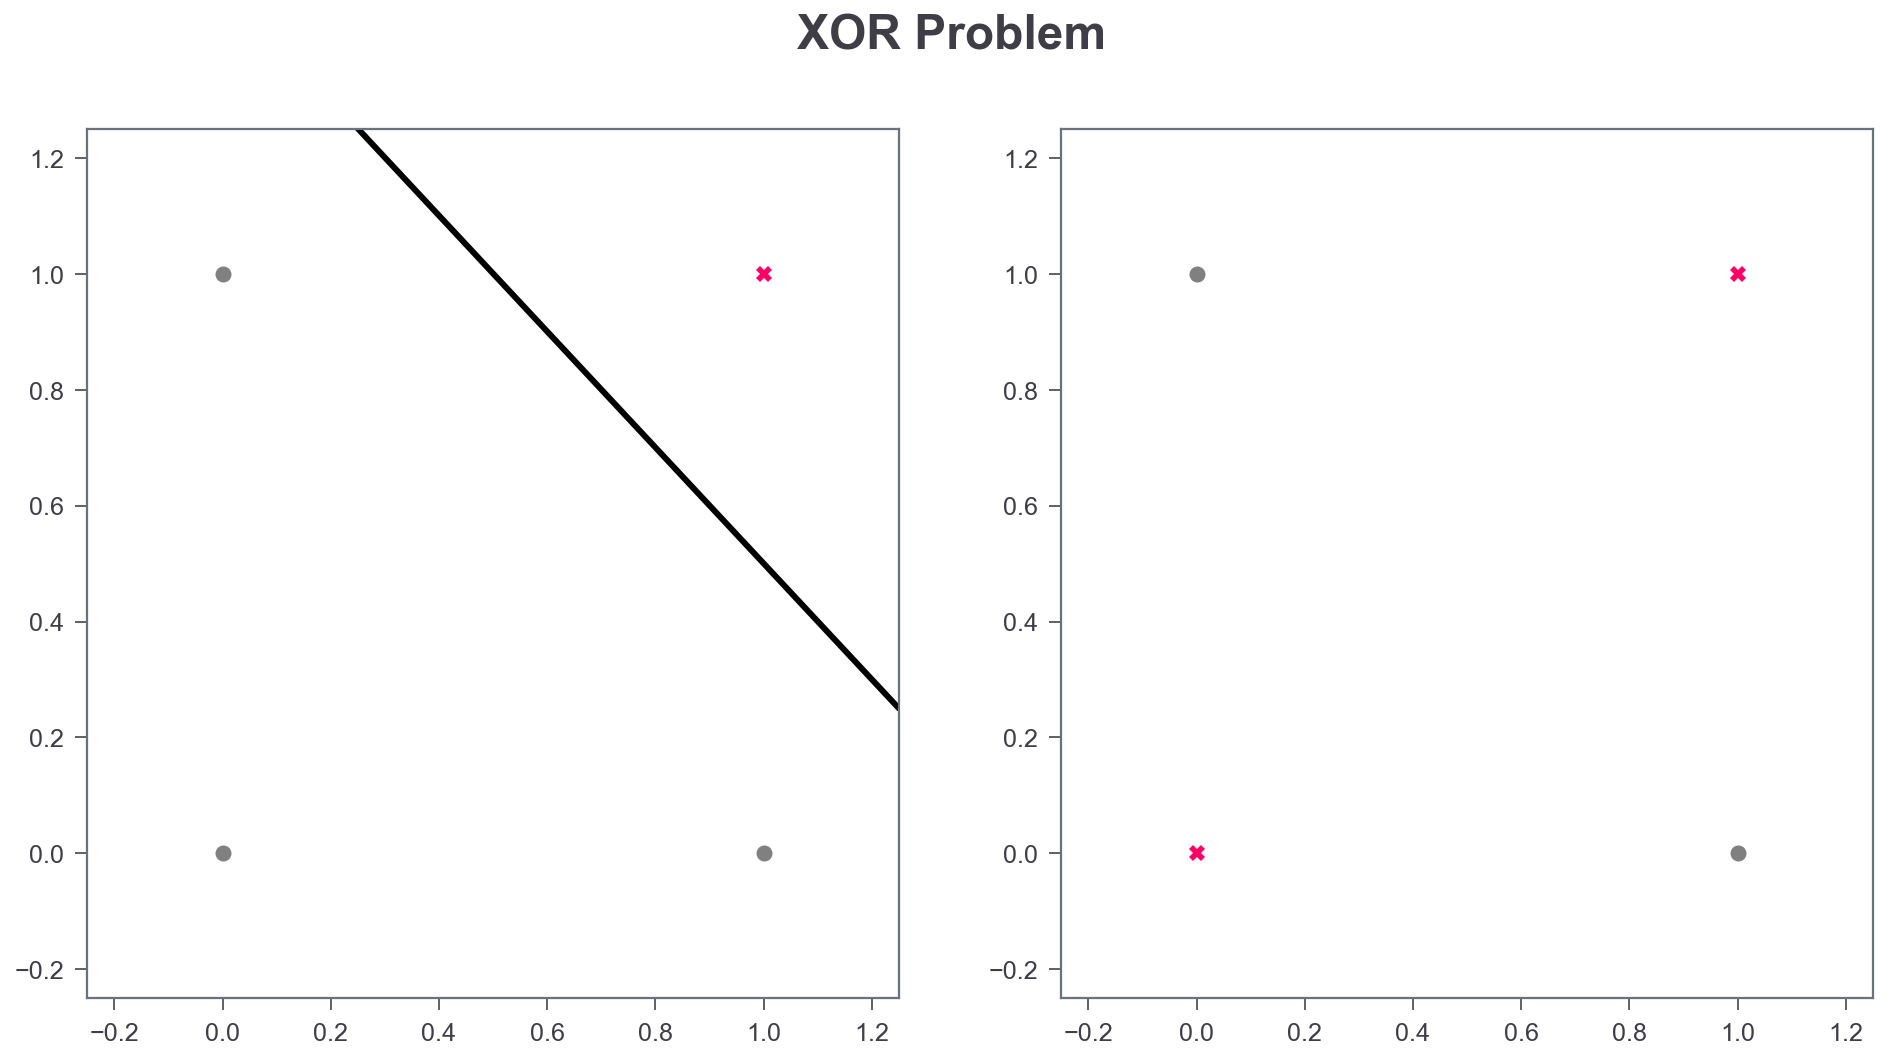

In [3]:
# initialize figur and axes
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False);
fig.suptitle('XOR Problem', fontsize=24, fontweight='bold')

# classifiable plot
axes[0].plot([0,0,1], [0,1,0], 'o', color='grey')
axes[0].plot([1], [1], 'X', color='#ff0066')
axes[0].plot([0.25, 1.25], [1.25, 0.25], color='black')
axes[0].set_xlim((-0.25, 1.25))
axes[0].set_ylim((-0.25, 1.25))

# unclassifiable plot
axes[1].plot([0,1], [1,0], 'o', color='grey')
axes[1].plot([0, 1], [0, 1], 'X', color='#ff0066')
axes[1].set_xlim((-0.25, 1.25))
axes[1].set_ylim((-0.25, 1.25))

plt.savefig('./img/xor_problem.png')
plt.show()

The limitations of the perceptron to estimate non-linear relationships is solved by chaining together multiple perceptrons to form a network, an artificial neural network. The same input pass through principle as for a single perceptron applies for all network nodes which will eventually result in the output estimate $\hat{y}$.

In [112]:
IFrame("./img/network.pdf", width=1000, height=800)

The estimate $\hat{y}$ is then compared to the actual observation $y$ using a <strong>Cost Function</strong> $E$ which computes the sum of squared errors. 

In [113]:
IFrame("./img/error_computation.pdf", width=1000, height=800)

If the cost function is minimized with respect to all weight parameters in $W$ the neural network learns the most effective (cheapest) representation of the data that leads to the desired result $y$. According to each weight's contribution to the total error $\delta E / \delta w_{ij}$ this error is propagated back through the network to the corresponding which which are than adjusted by a **learning rate**. This process is called **Back Propagation** since the errors are propagated back through the network. The optimal parameter constellati0on is than found by the **Gradient Descent Algorithm**

1. initialize with weights w_{ij}^{(0)}
2. for s = 1 to S do:
3.     compute $E[w_{ij}^{(s-1)}]$
4.     compute $w_{ij}^{(s)} = w_{ij}^{(s-1)} - \eta \frac{\partial E}{\partial w_{ij}^{(s)}}$   

until $E$ is sufficient small

In [100]:
IFrame("./img/gradient_descent.pdf", width=1000, height=800)

## A Supervised Learning Task

Time series prediction problems are inherently different from supervised learning problems in that obervastions posses a timely ordering and no observeable input. Thus, the time series prediction problem has to be converted into a regression problem.

A supervised learing problem requires data of the form $(X, y)$ where $y$ is the observeable output and $X$ is a matrix of input data which is assumed to cause the observed output. Since the output variable $y$ is continuous this problem is called a supervised regression problem.

In [4]:
np.random.seed(7)

In [5]:
df = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)
data = df.values

# using keras often requires the data type float32
data = data.astype('float32')

# slice the data
train = data[0:120, :]
test = data[120:, :]

print(len(train), len(test))

120 24


In [6]:
data

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.],
       [ 135.],
       [ 148.],
       [ 148.],
       [ 136.],
       [ 119.],
       [ 104.],
       [ 118.],
       [ 115.],
       [ 126.],
       [ 141.],
       [ 135.],
       [ 125.],
       [ 149.],
       [ 170.],
       [ 170.],
       [ 158.],
       [ 133.],
       [ 114.],
       [ 140.],
       [ 145.],
       [ 150.],
       [ 178.],
       [ 163.],
       [ 172.],
       [ 178.],
       [ 199.],
       [ 199.],
       [ 184.],
       [ 162.],
       [ 146.],
       [ 166.],
       [ 171.],
       [ 180.],
       [ 193.],
       [ 181.],
       [ 183.],
       [ 218.],
       [ 230.],
       [ 242.],
       [ 209.],
       [ 191.],
       [ 172.],
       [ 194.],
       [ 196.],
       [ 196.],
       [ 236.],
       [ 235.],
       [ 229.],
       [ 243.],
       [ 264.],
       [ 272.],
       [ 237.],
       [ 211.],
       [ 180.],
       [ 201.],
       [ 204.],
       [ 188.],
       [

The <code>prepare_data</code> function will be used to transform the time series into a regression problem. The <code>lags</code> argument takes an integer which corresponds the the number of previous time steps to use as input variables to predict the next time period. The default value is one but will be changed in a next iteration.

With the default setting a data set will be created where $X$ is the number of passengers at time $t$ and $y$ is the number of passengers at time $t+1$.

In [7]:
len(train)

120

In [8]:
def prepare_data(data, lags=1):
    """
    Create lagged data from an input time series
    """
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)

In [9]:
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test     # due to naming convention

In [10]:
y_train

array([ 118.,  132.,  129.,  121.,  135.,  148.,  148.,  136.,  119.,
        104.,  118.,  115.,  126.,  141.,  135.,  125.,  149.,  170.,
        170.,  158.,  133.,  114.,  140.,  145.,  150.,  178.,  163.,
        172.,  178.,  199.,  199.,  184.,  162.,  146.,  166.,  171.,
        180.,  193.,  181.,  183.,  218.,  230.,  242.,  209.,  191.,
        172.,  194.,  196.,  196.,  236.,  235.,  229.,  243.,  264.,
        272.,  237.,  211.,  180.,  201.,  204.,  188.,  235.,  227.,
        234.,  264.,  302.,  293.,  259.,  229.,  203.,  229.,  242.,
        233.,  267.,  269.,  270.,  315.,  364.,  347.,  312.,  274.,
        237.,  278.,  284.,  277.,  317.,  313.,  318.,  374.,  413.,
        405.,  355.,  306.,  271.,  306.,  315.,  301.,  356.,  348.,
        355.,  422.,  465.,  467.,  404.,  347.,  305.,  336.,  340.,
        318.,  362.,  348.,  363.,  435.,  491.,  505.,  404.,  359.,  310.], dtype=float32)

In [11]:
X_train

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.],
       [ 135.],
       [ 148.],
       [ 148.],
       [ 136.],
       [ 119.],
       [ 104.],
       [ 118.],
       [ 115.],
       [ 126.],
       [ 141.],
       [ 135.],
       [ 125.],
       [ 149.],
       [ 170.],
       [ 170.],
       [ 158.],
       [ 133.],
       [ 114.],
       [ 140.],
       [ 145.],
       [ 150.],
       [ 178.],
       [ 163.],
       [ 172.],
       [ 178.],
       [ 199.],
       [ 199.],
       [ 184.],
       [ 162.],
       [ 146.],
       [ 166.],
       [ 171.],
       [ 180.],
       [ 193.],
       [ 181.],
       [ 183.],
       [ 218.],
       [ 230.],
       [ 242.],
       [ 209.],
       [ 191.],
       [ 172.],
       [ 194.],
       [ 196.],
       [ 196.],
       [ 236.],
       [ 235.],
       [ 229.],
       [ 243.],
       [ 264.],
       [ 272.],
       [ 237.],
       [ 211.],
       [ 180.],
       [ 201.],
       [ 204.],
       [ 188.],
       [

In [12]:
y_train

array([ 118.,  132.,  129.,  121.,  135.,  148.,  148.,  136.,  119.,
        104.,  118.,  115.,  126.,  141.,  135.,  125.,  149.,  170.,
        170.,  158.,  133.,  114.,  140.,  145.,  150.,  178.,  163.,
        172.,  178.,  199.,  199.,  184.,  162.,  146.,  166.,  171.,
        180.,  193.,  181.,  183.,  218.,  230.,  242.,  209.,  191.,
        172.,  194.,  196.,  196.,  236.,  235.,  229.,  243.,  264.,
        272.,  237.,  211.,  180.,  201.,  204.,  188.,  235.,  227.,
        234.,  264.,  302.,  293.,  259.,  229.,  203.,  229.,  242.,
        233.,  267.,  269.,  270.,  315.,  364.,  347.,  312.,  274.,
        237.,  278.,  284.,  277.,  317.,  313.,  318.,  374.,  413.,
        405.,  355.,  306.,  271.,  306.,  315.,  301.,  356.,  348.,
        355.,  422.,  465.,  467.,  404.,  347.,  305.,  336.,  340.,
        318.,  362.,  348.,  363.,  435.,  491.,  505.,  404.,  359.,  310.], dtype=float32)

The data set now has the following form
<pre>
X       y
112     118
118     132
132     129
129     121
121     135
</pre>
That is, the function has successfully shifted the data for one time step and saved this new shifted series to an array.

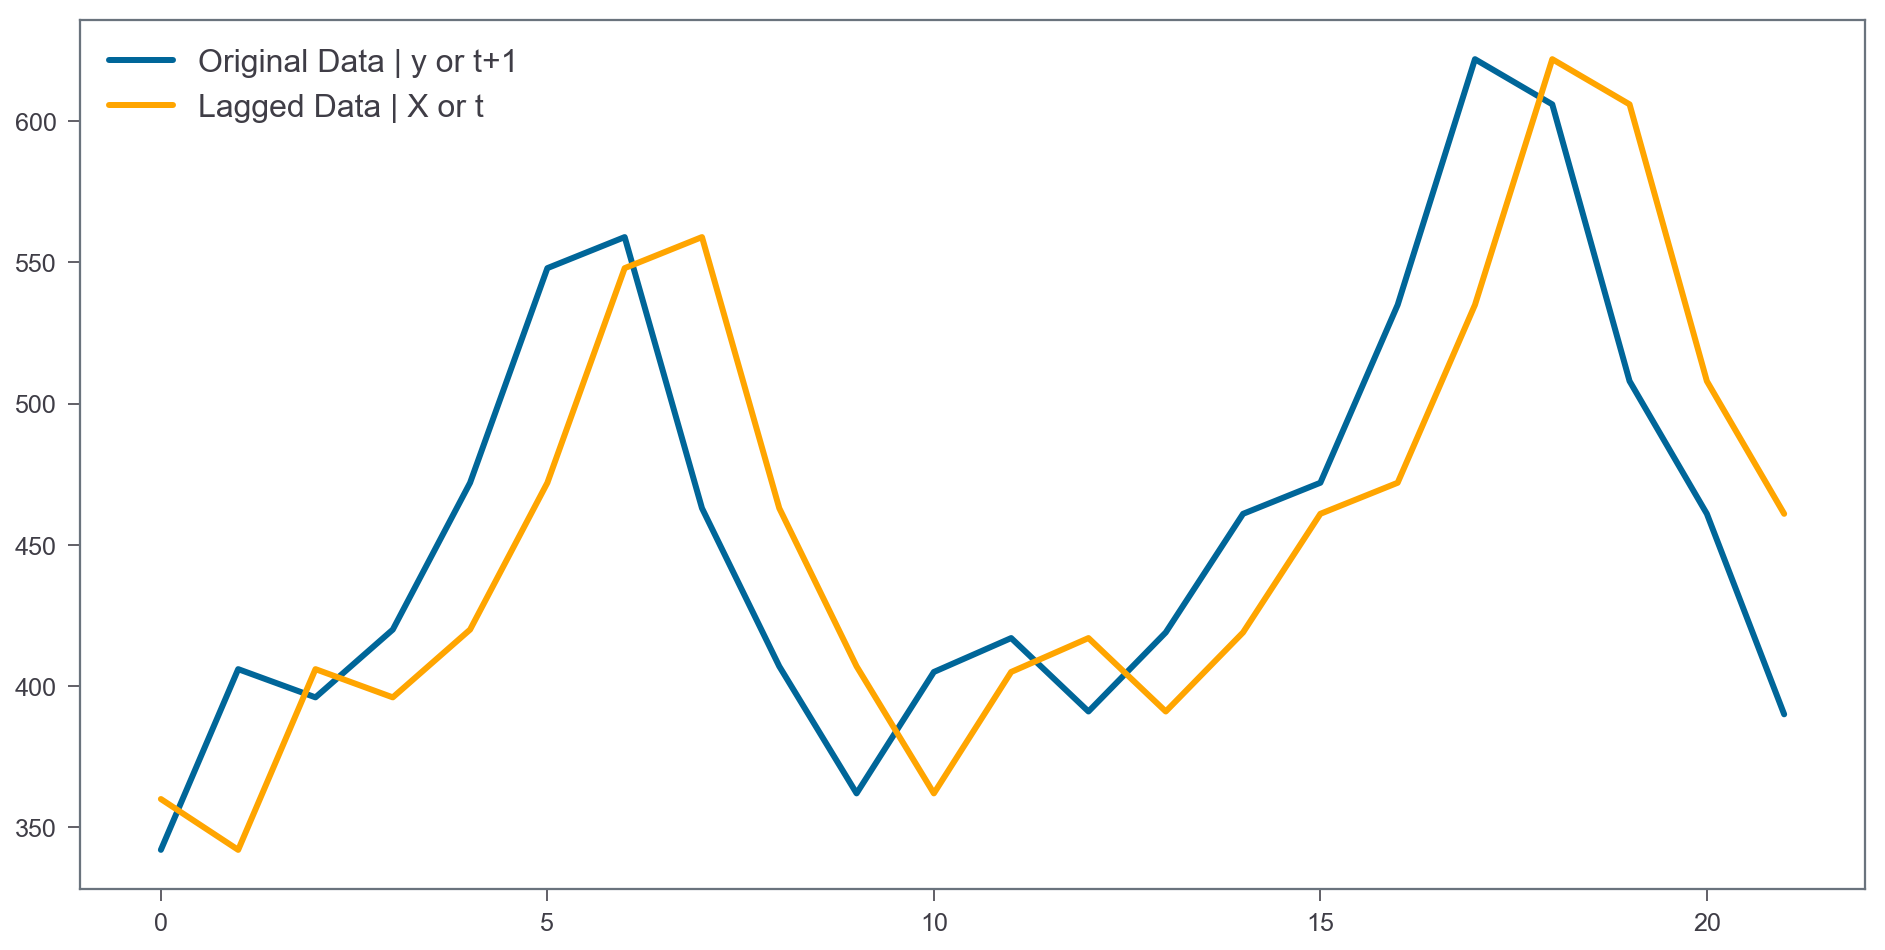

In [14]:
# plot the created data
plt.plot(y_test, label='Original Data | y or t+1', color='#006699')
plt.plot(X_test, label='Lagged Data | X or t', color='orange')
plt.legend(loc='upper left')
plt.savefig('./img/ann_training.png')
plt.show()

## Multilayer Perceptron Network

As previously, the data is sliced up into a <code>train</code> and <code>test</code> set to evaluate the performance of a two-year-ahead forecast.

The first simple network will have one input (size of the <code>lags</code> variable), one hidden layer with 8 neurons and an output layer. The model is fitted using the MSE criterion and rectified linear units as activation function

In [15]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(8, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 1s - loss: 64463.8981
Epoch 2/200
 - 0s - loss: 54674.5717
Epoch 3/200
 - 0s - loss: 44604.6961
Epoch 4/200
 - 0s - loss: 34447.2198
Epoch 5/200
 - 0s - loss: 24869.0229
Epoch 6/200
 - 0s - loss: 16623.3557
Epoch 7/200
 - 0s - loss: 10197.0437
Epoch 8/200
 - 0s - loss: 5843.5014
Epoch 9/200
 - 0s - loss: 3189.4699
Epoch 10/200
 - 0s - loss: 1823.3610
Epoch 11/200
 - 0s - loss: 1202.3818
Epoch 12/200
 - 0s - loss: 949.6755
Epoch 13/200
 - 0s - loss: 861.5993
Epoch 14/200
 - 0s - loss: 840.2744
Epoch 15/200
 - 0s - loss: 829.5926
Epoch 16/200
 - 0s - loss: 829.4177
Epoch 17/200
 - 0s - loss: 829.8589
Epoch 18/200
 - 0s - loss: 825.5621
Epoch 19/200
 - 0s - loss: 826.1753
Epoch 20/200
 - 0s - loss: 827.8854
Epoch 21/200
 - 0s - loss: 831.7803
Epoch 22/200
 - 0s - loss: 827.2383
Epoch 23/200
 - 0s - loss: 826.7112
Epoch 24/200
 - 0s - loss: 824.1500
Epoch 25/200
 - 0s - loss: 825.6389
Epoch 26/200
 - 0s - loss: 831.8959
Epoch 27/200
 - 0s - loss: 824.5786
Epoch 28/200
 - 0s 

In [16]:
# estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 816.13 MSE (28.57 RMSE)
Test Score: 2799.36 MSE (52.91 RMSE)


In [24]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

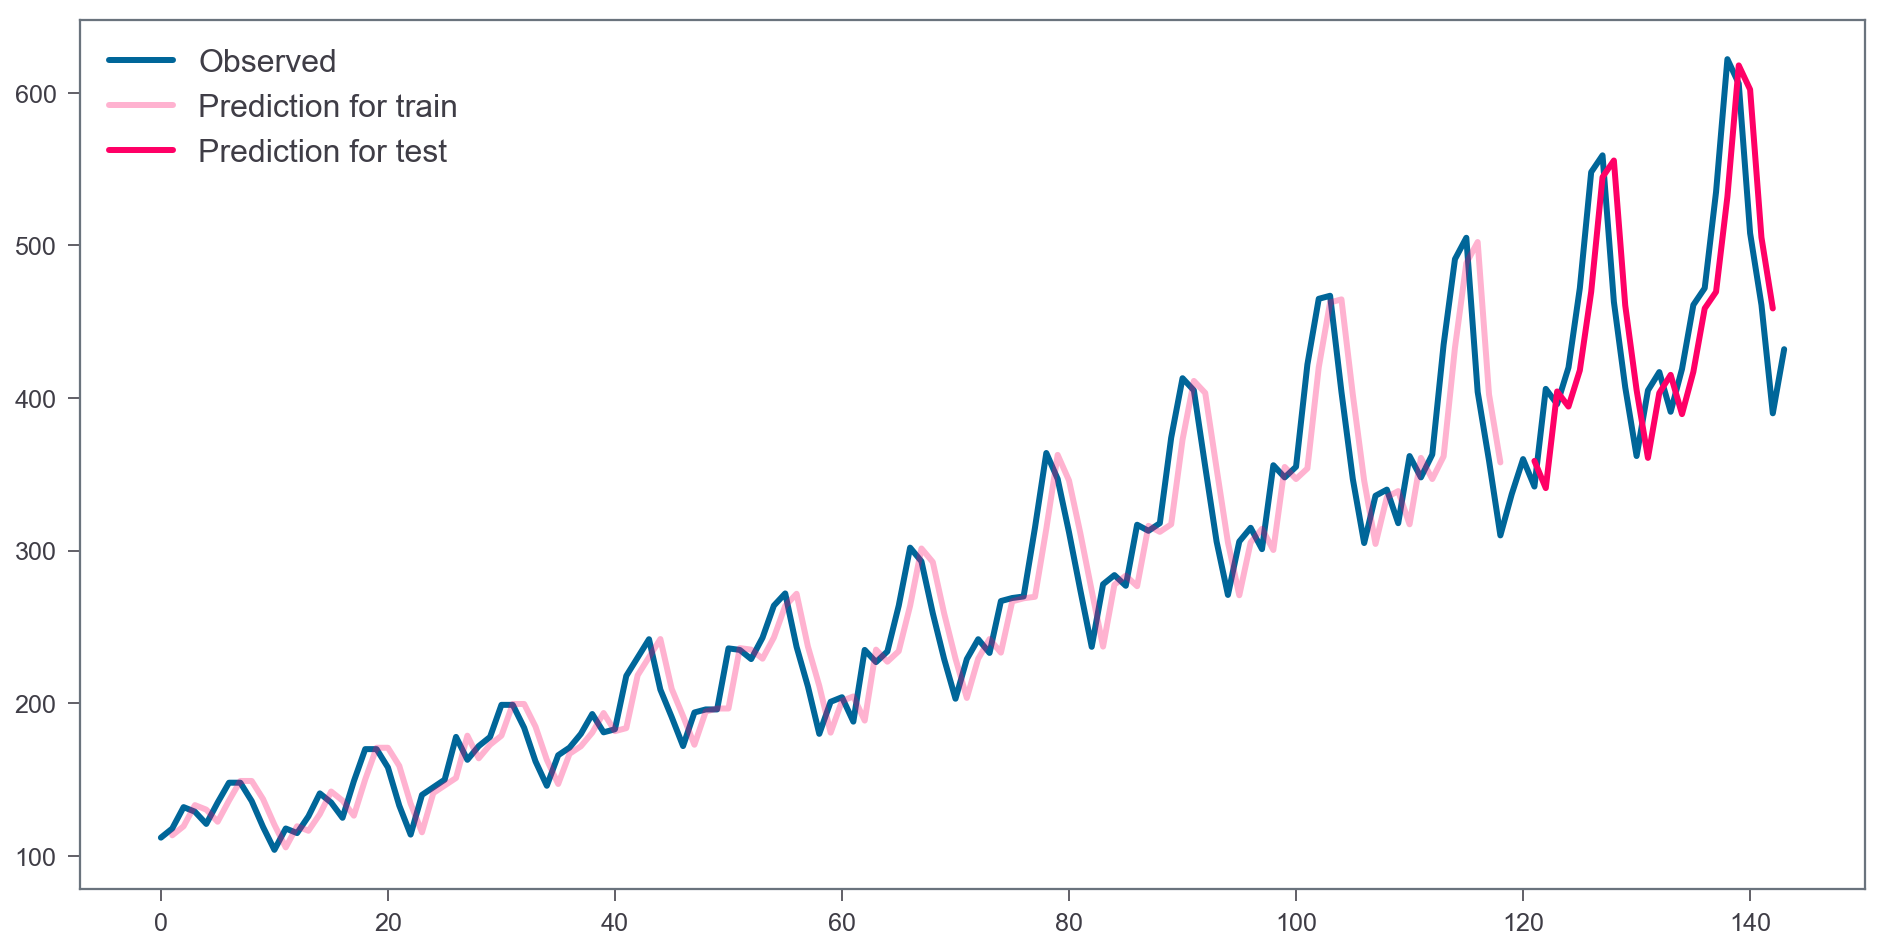

In [25]:
# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for train', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for test', color='#ff0066');
plt.legend(loc='best');
plt.savefig('./img/ann_forecast.png')
plt.show()

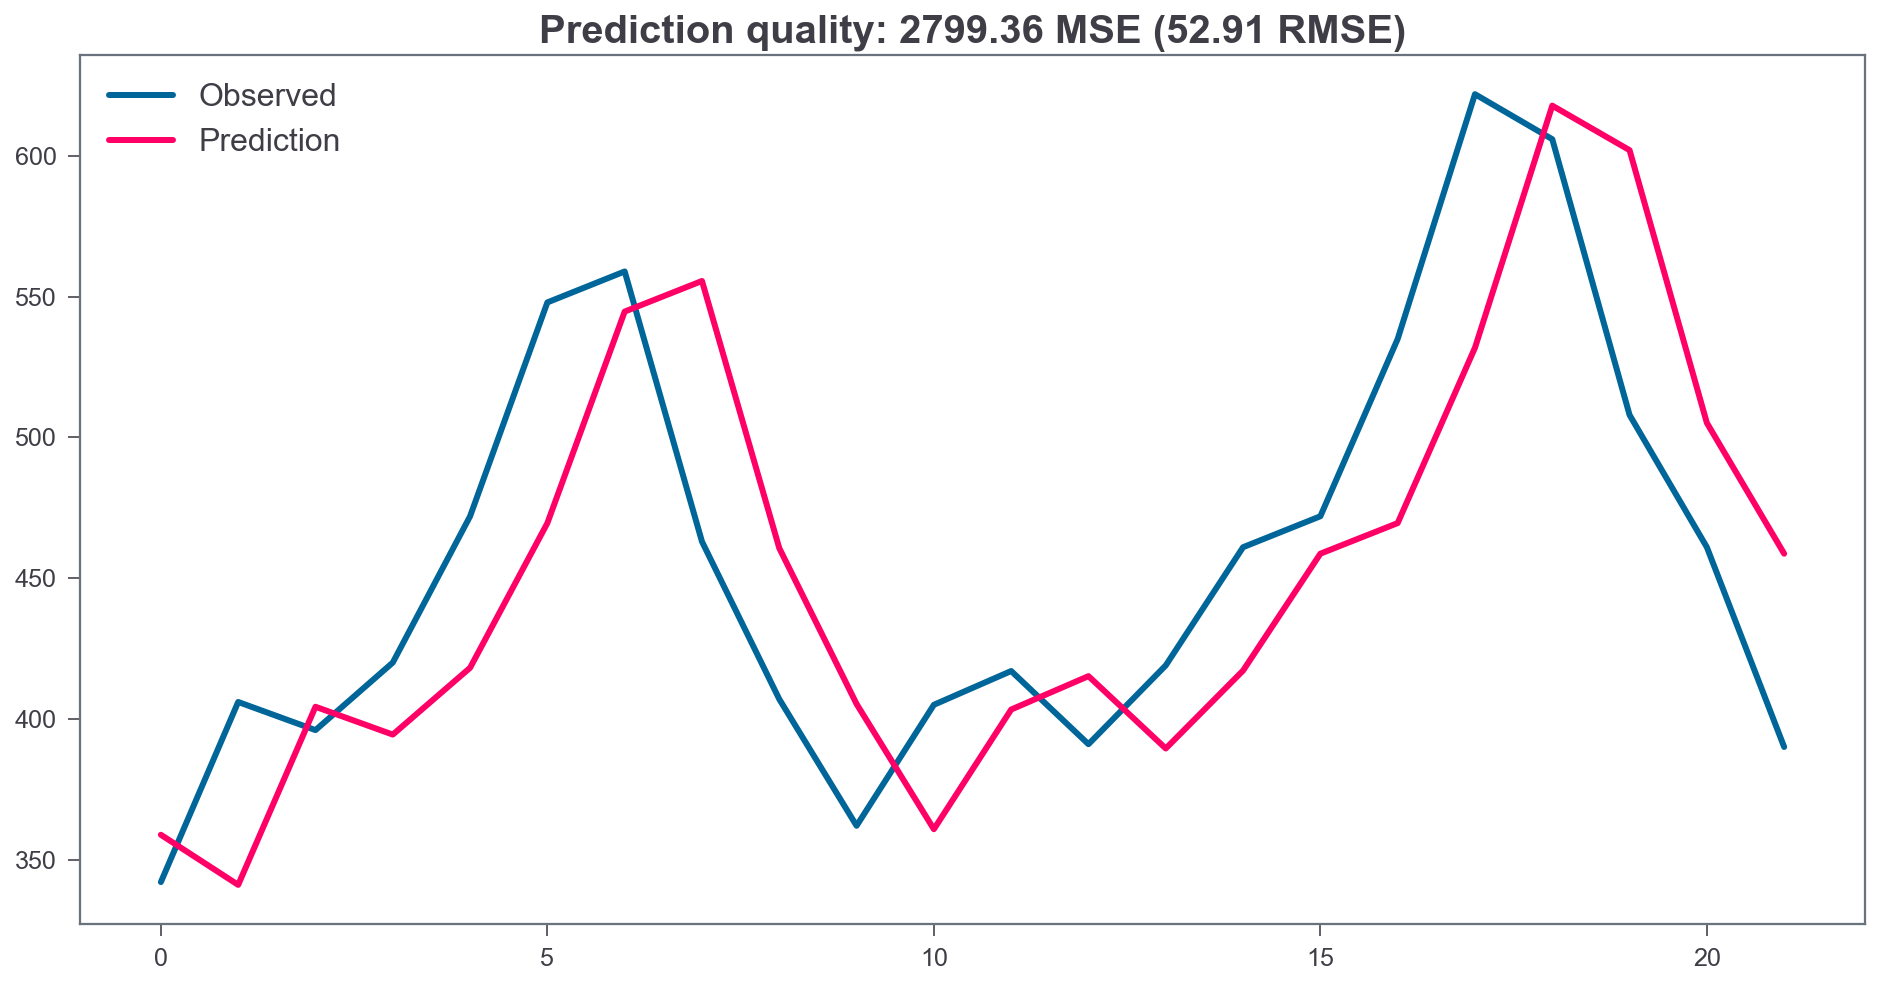

In [29]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='best');
plt.savefig('./img/ann_close.png')
plt.show()

Since the neural network has only been fed by the last observation, it did not have much choice but to learn to apply observation $t$ for the prediction of $t+1$.

## Multilayer perceptron with window

In [30]:
# reshape dataset
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

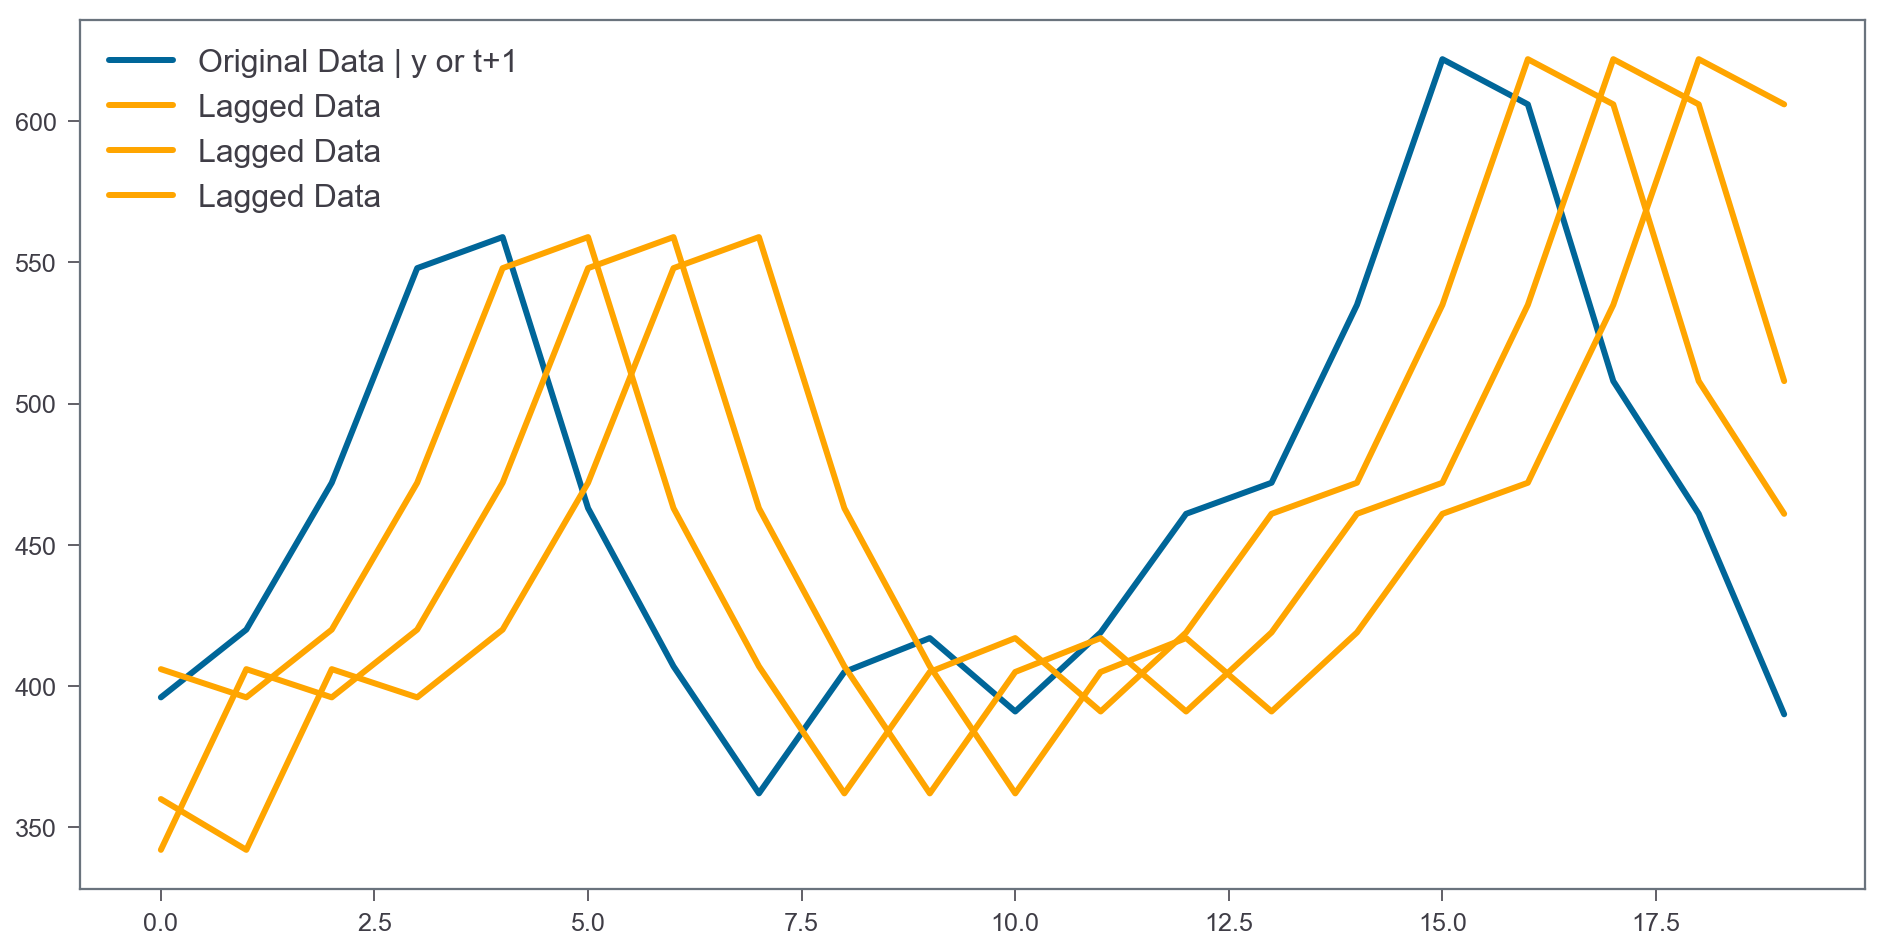

In [32]:
# plot the created data
plt.plot(y_test, label='Original Data | y or t+1', color='#006699')
plt.plot(X_test, label='Lagged Data', color='orange')
plt.legend(loc='best')
plt.savefig('./img/ann3_training.png')
plt.show()

In [33]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(12, input_dim=lags, activation='relu'))
mdl.add(Dense(8, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
 - 1s - loss: 15941.3535
Epoch 2/400
 - 0s - loss: 1725.4755
Epoch 3/400
 - 0s - loss: 1325.4673
Epoch 4/400
 - 0s - loss: 1299.9742
Epoch 5/400
 - 0s - loss: 1248.0710
Epoch 6/400
 - 0s - loss: 1218.3974
Epoch 7/400
 - 0s - loss: 1138.1030
Epoch 8/400
 - 0s - loss: 1099.2721
Epoch 9/400
 - 0s - loss: 1074.2472
Epoch 10/400
 - 0s - loss: 1086.7120
Epoch 11/400
 - 0s - loss: 1050.2390
Epoch 12/400
 - 0s - loss: 1058.1615
Epoch 13/400
 - 0s - loss: 990.3214
Epoch 14/400
 - 0s - loss: 981.6026
Epoch 15/400
 - 0s - loss: 982.7836
Epoch 16/400
 - 0s - loss: 932.7424
Epoch 17/400
 - 0s - loss: 923.7509
Epoch 18/400
 - 0s - loss: 915.0986
Epoch 19/400
 - 0s - loss: 935.5023
Epoch 20/400
 - 0s - loss: 858.1151
Epoch 21/400
 - 0s - loss: 857.5978
Epoch 22/400
 - 0s - loss: 883.3774
Epoch 23/400
 - 0s - loss: 831.2038
Epoch 24/400
 - 0s - loss: 841.7476
Epoch 25/400
 - 0s - loss: 874.9064
Epoch 26/400
 - 0s - loss: 839.9295
Epoch 27/400
 - 0s - loss: 806.7893
Epoch 28/400
 - 0s - los

Epoch 225/400
 - 0s - loss: 747.9792
Epoch 226/400
 - 0s - loss: 764.4631
Epoch 227/400
 - 0s - loss: 808.4548
Epoch 228/400
 - 0s - loss: 748.4677
Epoch 229/400
 - 0s - loss: 769.0355
Epoch 230/400
 - 0s - loss: 748.3329
Epoch 231/400
 - 0s - loss: 769.9810
Epoch 232/400
 - 0s - loss: 737.5970
Epoch 233/400
 - 0s - loss: 784.7773
Epoch 234/400
 - 0s - loss: 742.9310
Epoch 235/400
 - 0s - loss: 766.8584
Epoch 236/400
 - 0s - loss: 762.1747
Epoch 237/400
 - 0s - loss: 736.6784
Epoch 238/400
 - 0s - loss: 730.1420
Epoch 239/400
 - 0s - loss: 746.2124
Epoch 240/400
 - 0s - loss: 748.6890
Epoch 241/400
 - 0s - loss: 754.8350
Epoch 242/400
 - 0s - loss: 730.7992
Epoch 243/400
 - 0s - loss: 771.2048
Epoch 244/400
 - 0s - loss: 734.6748
Epoch 245/400
 - 0s - loss: 756.5205
Epoch 246/400
 - 0s - loss: 728.3873
Epoch 247/400
 - 0s - loss: 747.6100
Epoch 248/400
 - 0s - loss: 772.1398
Epoch 249/400
 - 0s - loss: 725.8507
Epoch 250/400
 - 0s - loss: 746.6278
Epoch 251/400
 - 0s - loss: 742.0171
E

In [34]:
# Estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 716.16 MSE (26.76 RMSE)
Test Score: 2228.12 MSE (47.20 RMSE)


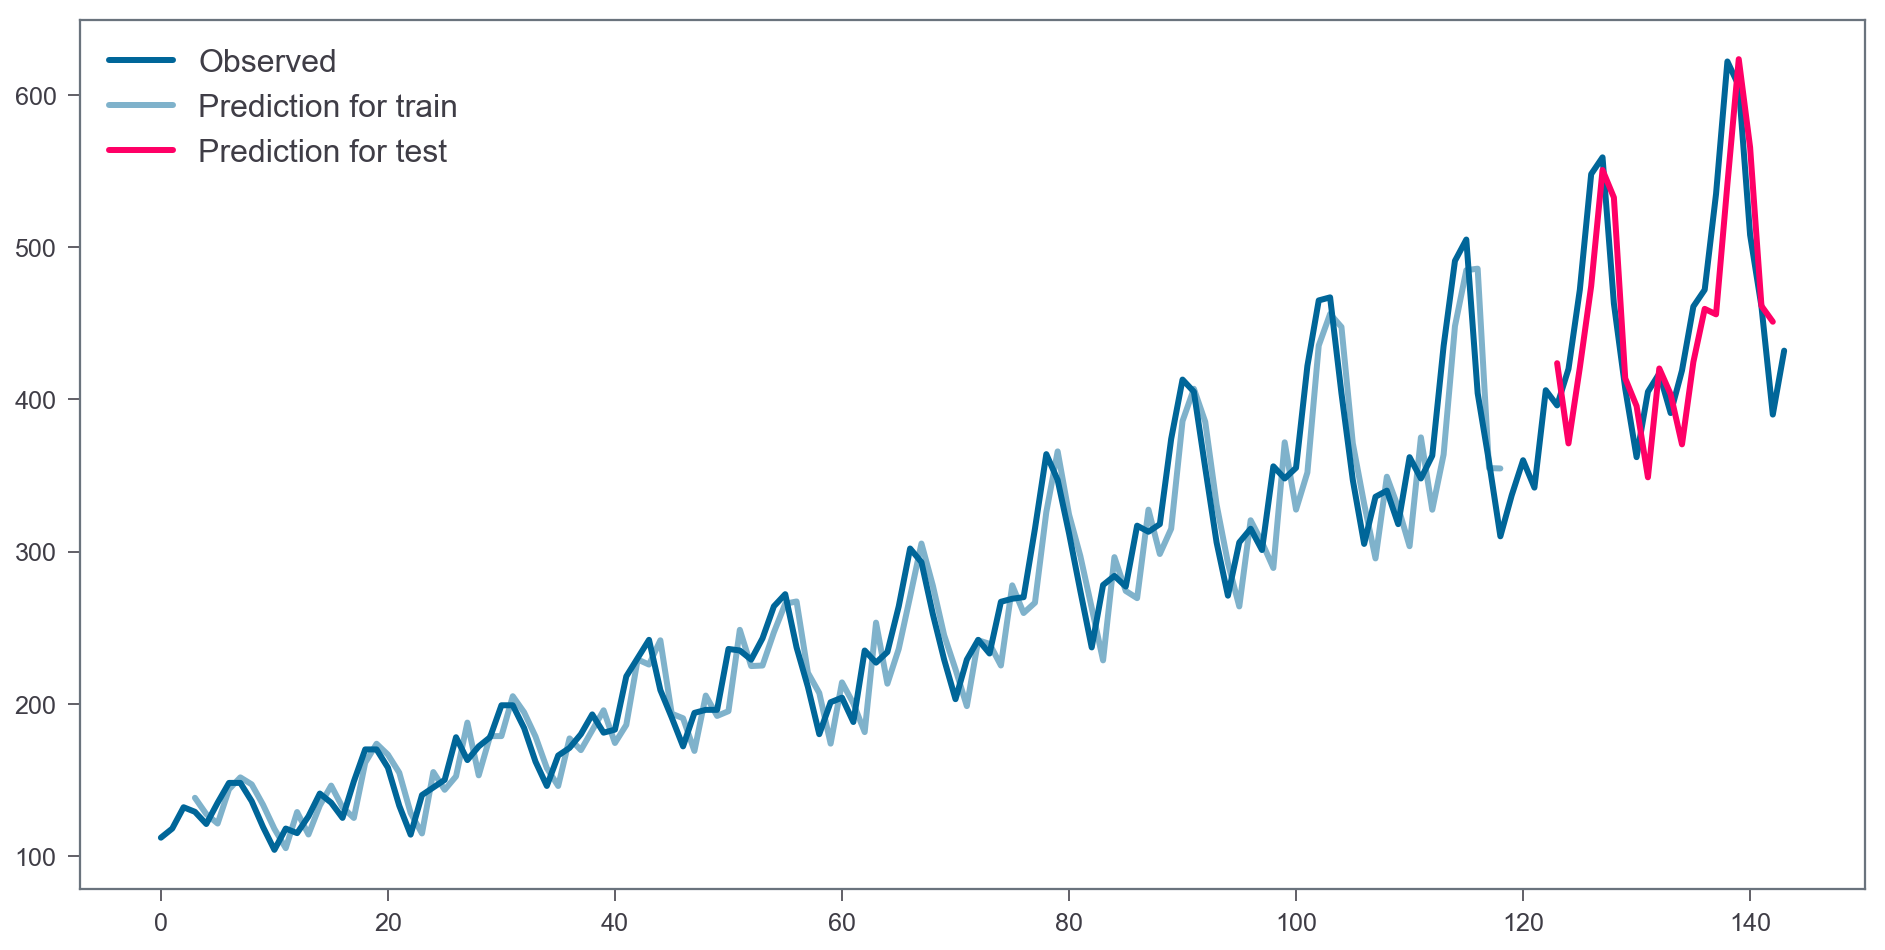

In [43]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags * 2)+1:len(data)-1, :] = test_predict

# plot observation and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for train', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for test', color='#ff0066');
plt.legend(loc='best');
plt.savefig('./img/ann3_forecast.png')
plt.show()

In [36]:
y_test

array([ 396.,  420.,  472.,  548.,  559.,  463.,  407.,  362.,  405.,
        417.,  391.,  419.,  461.,  472.,  535.,  622.,  606.,  508.,
        461.,  390.], dtype=float32)

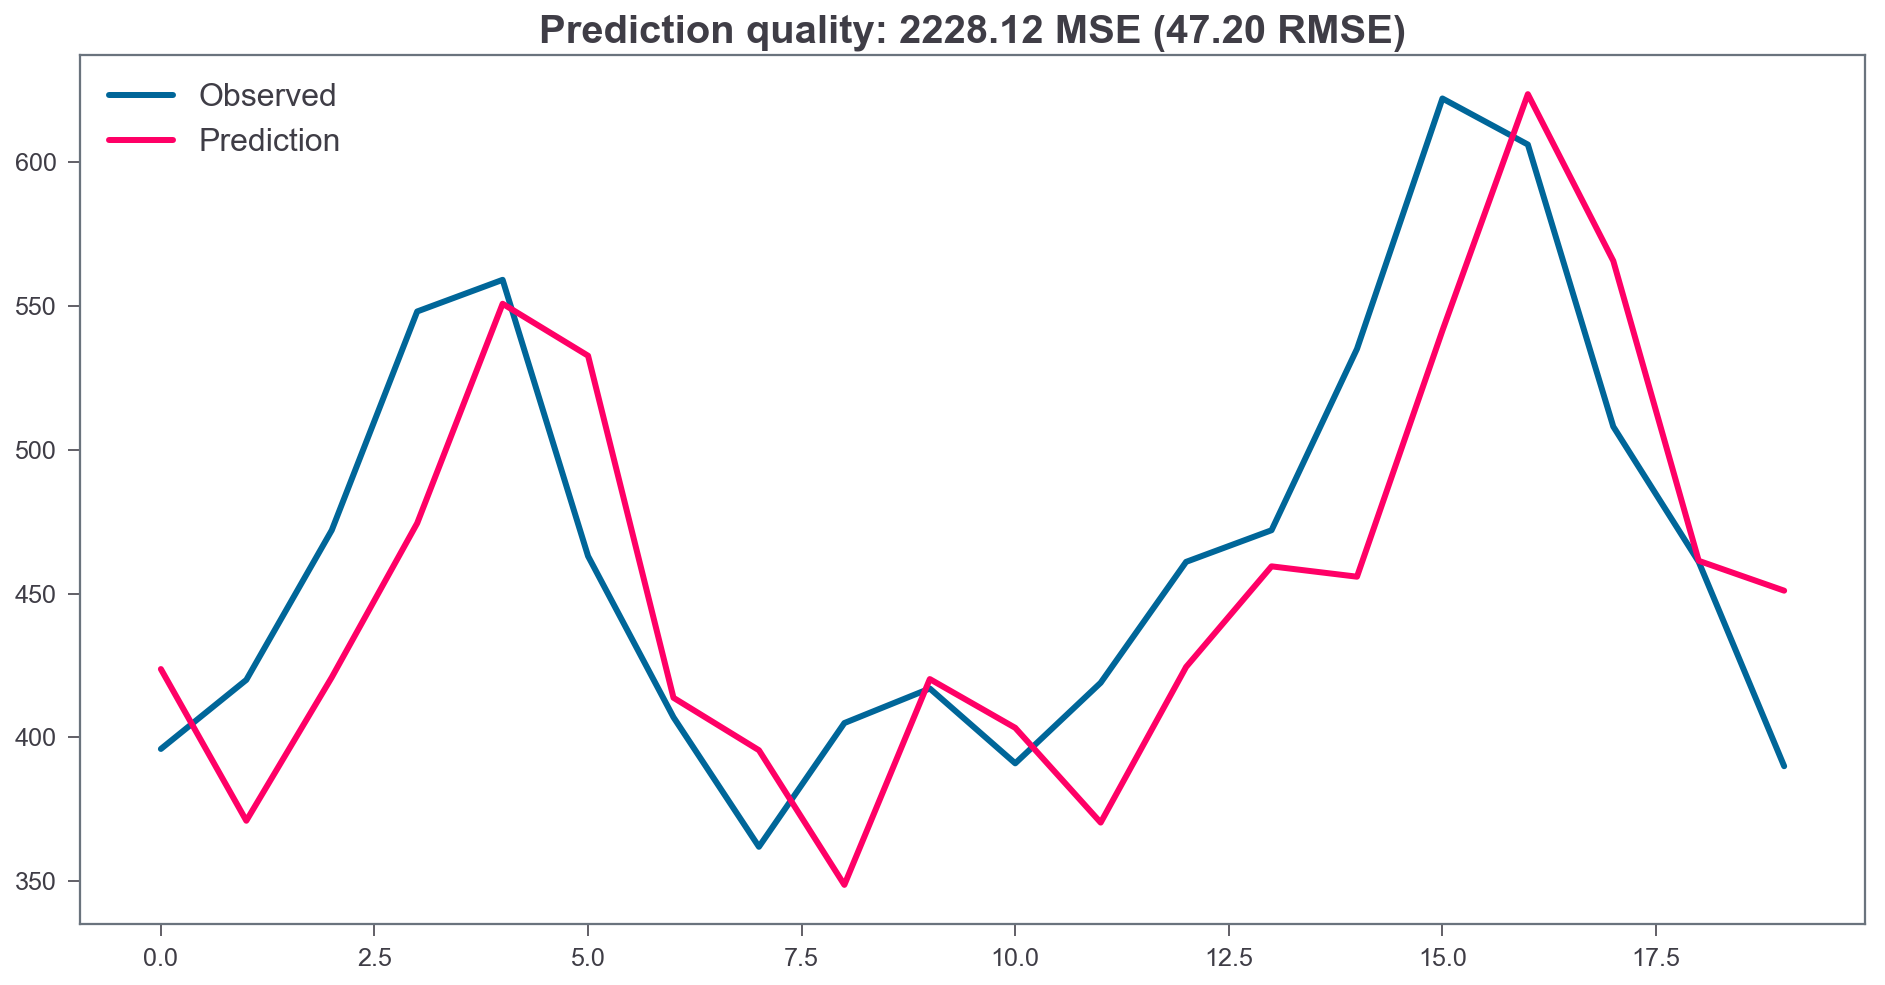

In [38]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='upper left');
plt.savefig('./img/ann3_close.png')
plt.show()

# LSTM Recurrent Neural Network

Long short-term memory (LSTM) is a recurrent neural network (RNN) architecture that remembers values over arbitrary intervals. Stored values are not modified as learning proceeds. RNNs allow forward and backward connections between neurons. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. - <a href="https://en.wikipedia.org/wiki/Long_short-term_memory">Wikipedia</a>

## Architecture



LSTM blocks contain three or four "gates" that control information flow. These gates are implemented using the logistic function to compute a value between 0 and 1. Multiplication is applied with this value to partially allow or deny information to flow into or out of the memory. For example, an "input" gate controls the extent to which a new value flows into the memory. A "forget" gate controls the extent to which a value remains in memory. An "output" gate controls the extent to which the value in memory is used to compute the output activation of the block. (In some implementations, the input and forget gates are merged into a single gate. The motivation for combining them is that the time to forget is when a new value worth remembering becomes available.)

In [47]:
# fix random seed for reproducibility
np.random.seed(1)

# load the dataset
df = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)
data = df.values
data = data.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

# split into train and test sets
train = dataset[0:120, :]
test = dataset[120:, :]

# reshape into X=t and Y=t+1
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [48]:
# create and fit the LSTM network
model = Sequential()
model.add(Dense(3, input_shape=(1, lags), activation='relu'))
model.add(LSTM(4))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0811
Epoch 2/100
 - 0s - loss: 0.0271
Epoch 3/100
 - 0s - loss: 0.0206
Epoch 4/100
 - 0s - loss: 0.0174
Epoch 5/100
 - 0s - loss: 0.0148
Epoch 6/100
 - 0s - loss: 0.0126
Epoch 7/100
 - 0s - loss: 0.0107
Epoch 8/100
 - 0s - loss: 0.0091
Epoch 9/100
 - 0s - loss: 0.0080
Epoch 10/100
 - 0s - loss: 0.0071
Epoch 11/100
 - 0s - loss: 0.0070
Epoch 12/100
 - 0s - loss: 0.0060
Epoch 13/100
 - 0s - loss: 0.0057
Epoch 14/100
 - 0s - loss: 0.0052
Epoch 15/100
 - 0s - loss: 0.0048
Epoch 16/100
 - 0s - loss: 0.0047
Epoch 17/100
 - 0s - loss: 0.0040
Epoch 18/100
 - 0s - loss: 0.0042
Epoch 19/100
 - 0s - loss: 0.0038
Epoch 20/100
 - 0s - loss: 0.0035
Epoch 21/100
 - 0s - loss: 0.0032
Epoch 22/100
 - 0s - loss: 0.0032
Epoch 23/100
 - 0s - loss: 0.0029
Epoch 24/100
 - 0s - loss: 0.0028
Epoch 25/100
 - 0s - loss: 0.0029
Epoch 26/100
 - 0s - loss: 0.0029
Epoch 27/100
 - 0s - loss: 0.0027
Epoch 28/100
 - 0s - loss: 0.0027
Epoch 29/100
 - 0s - loss: 0.0027
Epoch 30/100
 - 0s - lo

In [49]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [50]:
# invert transformation
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [51]:
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: {:.2f} RMSE'.format(train_score))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: {:.2f} RMSE'.format(test_score))

Train Score: 25.61 RMSE
Test Score: 47.89 RMSE


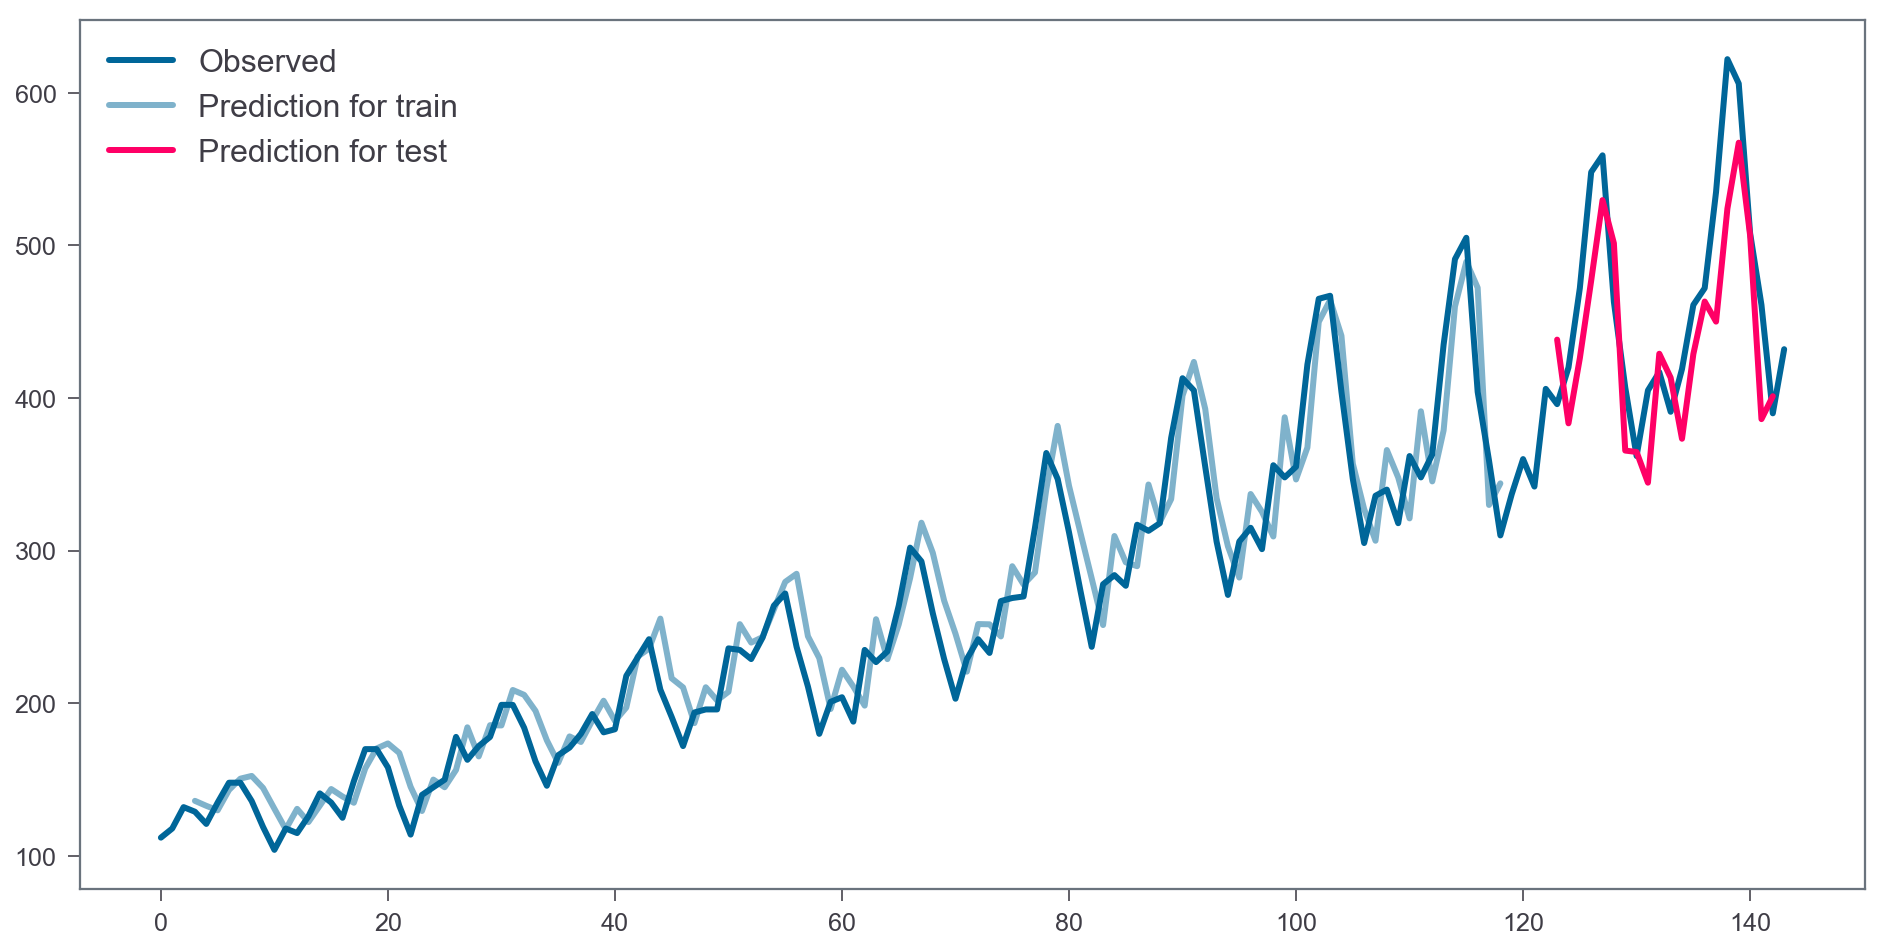

In [53]:
# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags:len(train_predict)+lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (lags * 2)+1:len(data)-1, :] = test_predict

# plot observation and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for train', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for test', color='#ff0066');
plt.legend(loc='best');
plt.savefig('./img/lstm_close.png')
plt.show()

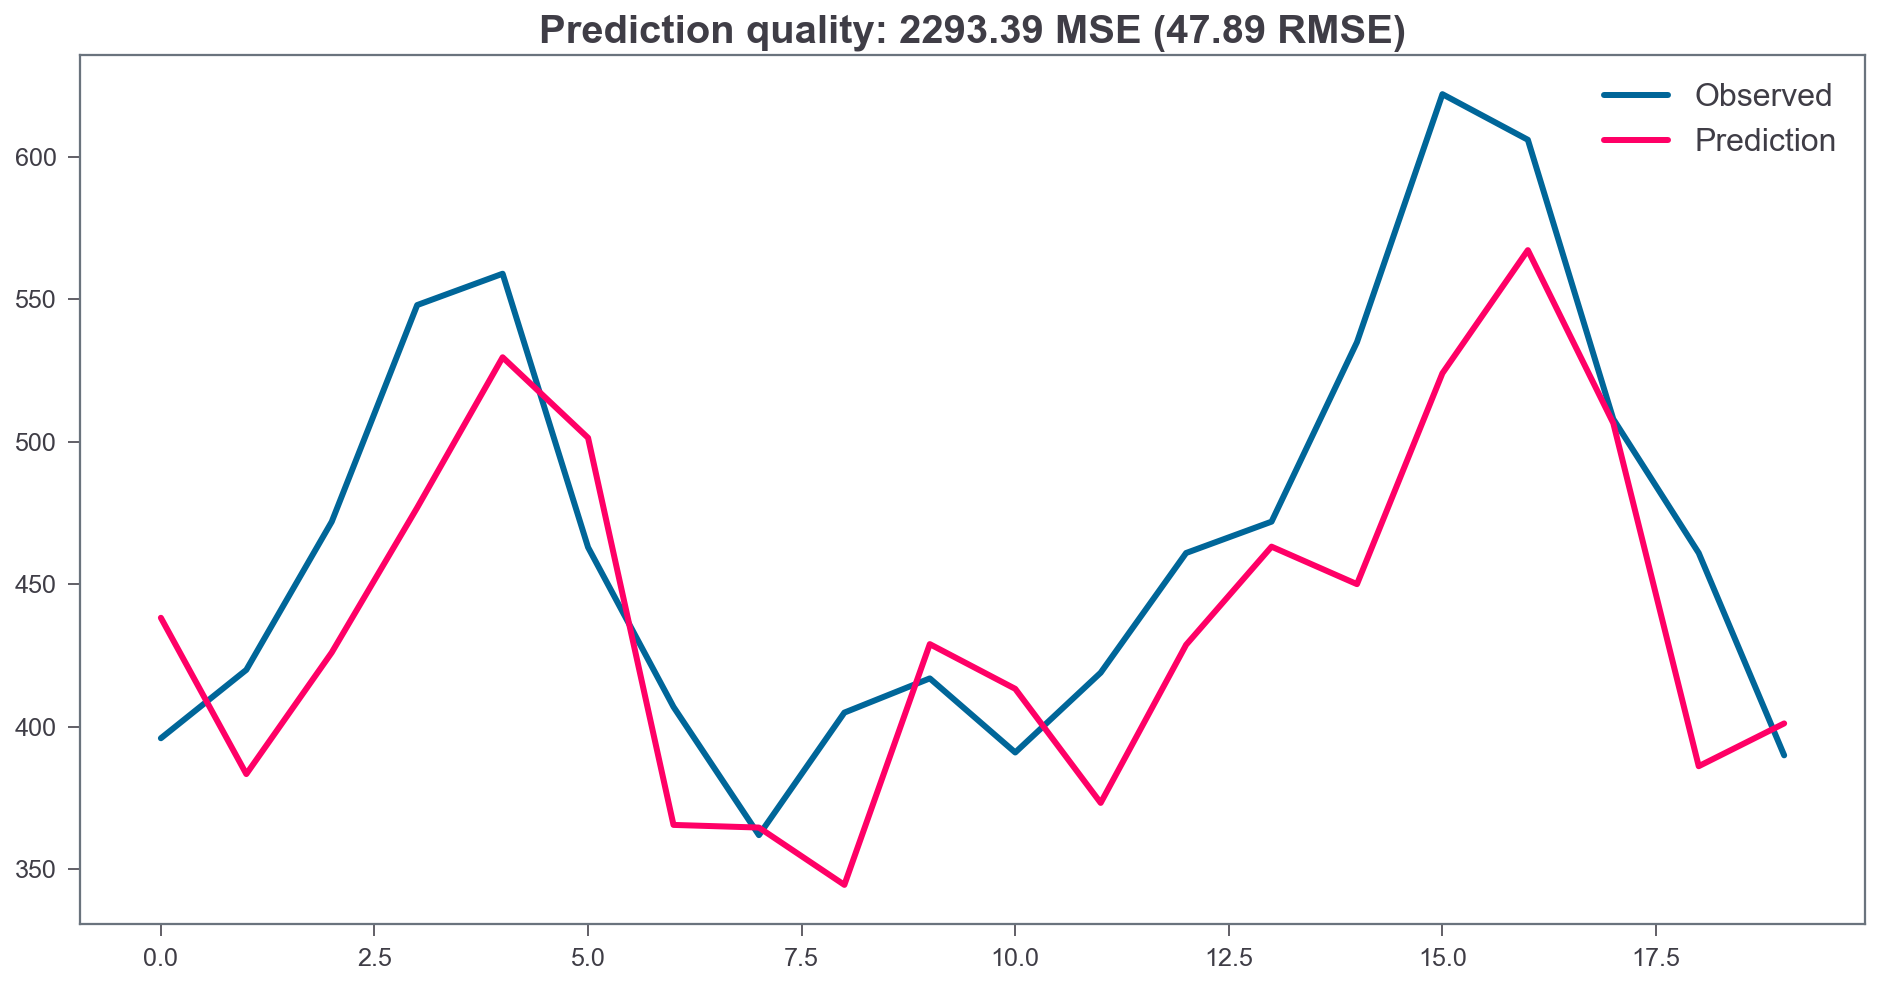

In [55]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='best');
plt.show()